In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# silent warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
#Yellow Taxi Data
df_yellow = []
base = "../../../Data/yellow/{}/yellow_tripdata_{}-{}.csv"
base_lookup = "../../../Data/Taxi Zone Maps and Lookup Tables/taxi_zone_lookupv1.csv"

In [3]:
base

'../../../Data/yellow/{}/yellow_tripdata_{}-{}.csv'

In [4]:
df_yellow = []

yrs = [(2024, 4), (2023, 6), (2022, 6), (2021, 6), (2020, 6)]


for yr, mth in yrs:
    y2024 = []
    print(yr)
    for i in range(1, mth+1):

        df = pd.read_csv(base.format(yr, yr, str(i).zfill(2)))
        # take 50% of the data
        df = df.sample(frac=0.5)
        print(f"\t{yr}-{i}-{df.shape}")
        print(f"\t\t{list(df.columns)}")
        y2024.append(df)
        df = None
    df_yellow.append(pd.concat(y2024))
    # clear buffer
    y2024 = []
    # clear stdout
    sys.stdout.flush()

2024
	2024-1-(1482312, 19)
		['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
	2024-2-(1503763, 19)
		['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
	2024-3-(1791314, 19)
		['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge

In [5]:
df = pd.concat([_.sample(frac=0.3) for _ in df_yellow])

In [6]:
date_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

date_cols_rename = ['pickup_datetime', 'dropoff_datetime', ]
df.rename(columns={k: v for k, v in zip(date_cols, date_cols_rename)}, inplace=True)

new_cols = ['pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time']

for col, new_col in zip(date_cols_rename, new_cols):
    df[new_col] = df[col].dt.date if 'date' in new_col else df[col].dt.time

new_name = ['pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12211171 entries, 1922820 to 15978
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   pickup_datetime        datetime64[ns]
 2   dropoff_datetime       datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           float64       
 8   DOLocationID           float64       
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [7]:
df.reset_index(drop=True, inplace=True)
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee,pickup_date,pickup_time
0,1.0,2024-01-22 17:40:05,2024-01-22 17:44:13,1.0,0.60,1.0,N,262.0,236.0,1.0,...,0.5,2.00,0.00,1.0,14.30,2.5,0.00,NaN,2024-01-22,17:44:13
1,2.0,2024-04-02 12:50:45,2024-04-02 12:56:25,2.0,0.79,1.0,N,236.0,236.0,1.0,...,0.5,2.24,0.00,1.0,13.44,2.5,0.00,NaN,2024-04-02,12:56:25
2,1.0,2024-04-17 15:19:37,2024-04-17 15:24:15,1.0,0.60,1.0,N,236.0,236.0,1.0,...,0.5,0.00,0.00,1.0,9.80,2.5,0.00,NaN,2024-04-17,15:24:15
3,2.0,2024-04-30 22:28:43,2024-04-30 22:49:03,1.0,8.91,1.0,N,138.0,186.0,1.0,...,0.5,3.00,6.94,1.0,58.29,2.5,1.75,NaN,2024-04-30,22:49:03
4,2.0,2024-01-13 06:50:31,2024-01-13 07:19:43,1.0,18.05,2.0,N,132.0,249.0,1.0,...,0.5,16.19,6.94,1.0,98.88,2.5,1.75,NaN,2024-01-13,07:19:43


In [8]:
def check_unique(d):
    for c in d.columns:
        print(f"{c}: {d[c].nunique()}")
def check_missing(d):
    for c in d.columns:
        print(f"{c}: {d[c].isnull().sum()} ({d[c].isnull().sum()/d.shape[0] * 100:.2f}%)")

def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'
    
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

In [9]:
df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(exclude=['number'])
num_cols = df_num.columns.to_list()
non_num_cols = df_cat.columns.to_list()

print(f"All columns: {df.shape}")
print(f"Numerical columns: {df_num.shape}")
print(f"Non-numerical columns: {df_cat.shape}")

All columns: (12211171, 22)
Numerical columns: (12211171, 17)
Non-numerical columns: (12211171, 5)


### Process Numeric Cols

In [10]:
df_num.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,1.0,1.0,0.60,1.0,262.0,236.0,1.0,5.8,5.0,0.5,2.00,0.00,1.0,14.30,2.5,0.00,NaN
1,2.0,2.0,0.79,1.0,236.0,236.0,1.0,7.2,0.0,0.5,2.24,0.00,1.0,13.44,2.5,0.00,NaN
2,1.0,1.0,0.60,1.0,236.0,236.0,1.0,5.8,2.5,0.5,0.00,0.00,1.0,9.80,2.5,0.00,NaN
3,2.0,1.0,8.91,1.0,138.0,186.0,1.0,36.6,6.0,0.5,3.00,6.94,1.0,58.29,2.5,1.75,NaN
4,2.0,1.0,18.05,2.0,132.0,249.0,1.0,70.0,0.0,0.5,16.19,6.94,1.0,98.88,2.5,1.75,NaN


In [11]:
check_missing(df_num)

VendorID: 0 (0.00%)
passenger_count: 501161 (4.10%)
trip_distance: 0 (0.00%)
RatecodeID: 501161 (4.10%)
PULocationID: 0 (0.00%)
DOLocationID: 0 (0.00%)
payment_type: 0 (0.00%)
fare_amount: 0 (0.00%)
extra: 0 (0.00%)
mta_tax: 0 (0.00%)
tip_amount: 0 (0.00%)
tolls_amount: 0 (0.00%)
improvement_surcharge: 0 (0.00%)
total_amount: 0 (0.00%)
congestion_surcharge: 501161 (4.10%)
Airport_fee: 8029193 (65.75%)
airport_fee: 7792891 (63.82%)


In [12]:
cols_fill = ['passenger_count', 'congestion_surcharge']
cols_drop = ['Airport_fee', 'airport_fee']
cols_to_cat = ['VendorID', 'RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID']

df_num.drop([*cols_drop, *cols_to_cat], axis=1, inplace=True)

1. Negative values: trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, total_amountimprovement_surcharge	, congestion_surcharge

### Categorical

In [13]:
df_cat1 = df_cat.copy()
df_cat1.head()


,pickup_datetime,dropoff_datetime,store_and_fwd_flag,pickup_date,pickup_time
0,2024-01-22 17:40:05,2024-01-22 17:44:13,N,2024-01-22,17:44:13
1,2024-04-02 12:50:45,2024-04-02 12:56:25,N,2024-04-02,12:56:25
2,2024-04-17 15:19:37,2024-04-17 15:24:15,N,2024-04-17,15:24:15
3,2024-04-30 22:28:43,2024-04-30 22:49:03,N,2024-04-30,22:49:03
4,2024-01-13 06:50:31,2024-01-13 07:19:43,N,2024-01-13,07:19:43


In [14]:
# Add cols_to_cat
for col in cols_to_cat:
    try:
        df_cat1[col] = df[col].astype('int').astype('category')
    except :
        print(f"Error in {col}")
        print(df[col].value_counts())
        


# Create year, month, day, hour, minute, second, day of week, and week of year
df_cat1['p_year'] = df_cat['pickup_datetime'].dt.year.astype('category')
df_cat1['p_month'] = df_cat['pickup_datetime'].dt.month.astype('category')
df_cat1['p_week'] = df_cat['pickup_datetime'].dt.dayofweek.astype('category')
df_cat1['p_day'] = df_cat['pickup_datetime'].dt.day.astype('category')
df_cat1['p_hour'] = df_cat['pickup_datetime'].dt.hour
df_cat1['d_hour'] = df_cat['dropoff_datetime'].dt.hour
df_cat1['p_minute'] = df_cat['pickup_datetime'].dt.minute
df_cat1['d_minute'] = df_cat['dropoff_datetime'].dt.minute

df_cat1['p_day_part'] = df_cat1['p_hour'].apply(get_part_of_day).astype('category')
df_cat1['p_season'] = df_cat1['p_month'].apply(get_season).astype('category')

# travel time in minutes
df_cat1['travel_time'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.seconds / 60

#Drop datetime
df_cat1.drop(['pickup_datetime', 'dropoff_datetime', 'pickup_time', 'pickup_date', ], axis=1, inplace=True)


Error in RatecodeID
RatecodeID
1.0     11191621
2.0       360389
5.0        67279
99.0       44730
3.0        29300
4.0        16633
6.0           58
Name: count, dtype: int64


In [15]:
# # Check if p_year and d_year are the same for all records
# for col in [('p_hour', 'd_hour'), ('p_minute', 'd_minute')]:
#     tmp = def_cat1[col[0]] == def_cat1[col[1]]
#     print(col)
#     print(sum(tmp),"==", len(def_cat1),  sum(tmp) == len(def_cat1), (sum(tmp)/len(def_cat1)), " All equall: ", tmp.all())
#     if tmp.all():
        
#         print("All trips are within the same year. You can use a single 'year' column.")
#         def_cat1[col[0].split('_')[-1]] = def_cat1[col[0]]
#         def_cat1.drop(columns=[col[0], col[1]], inplace=True)
#     else:
#         print(f"\t{col}")
#         print(f"Some trips span different years. You can use both {col[0].split('_')[-1]} and {col[1].split('_')[-1]} columns.")

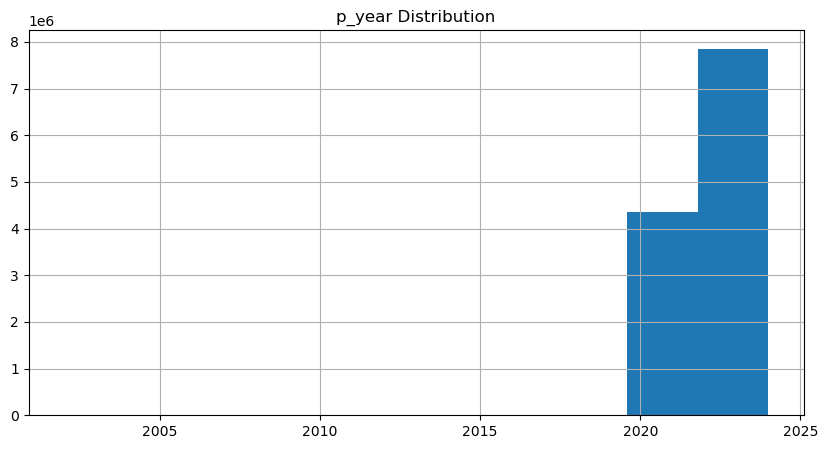

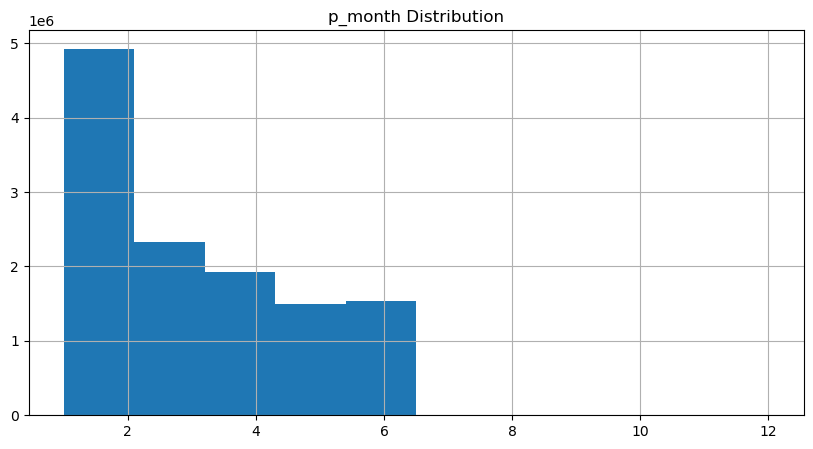

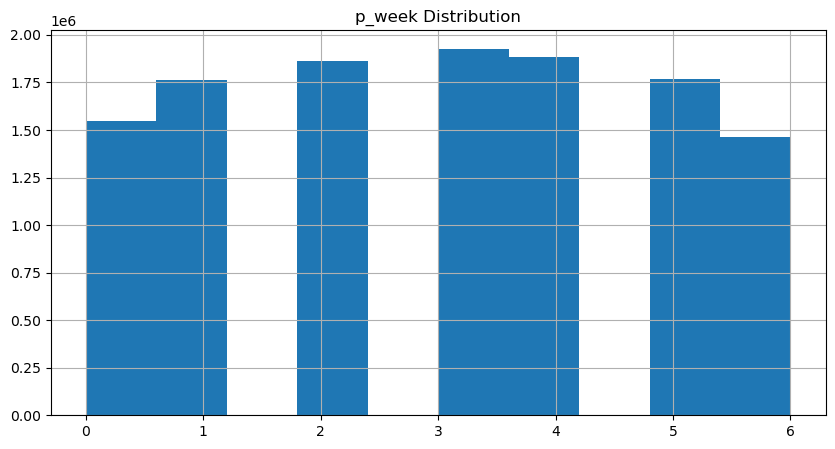

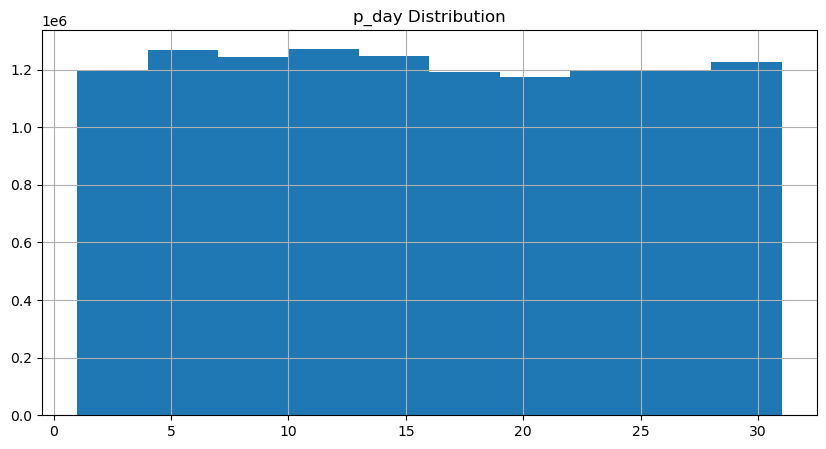

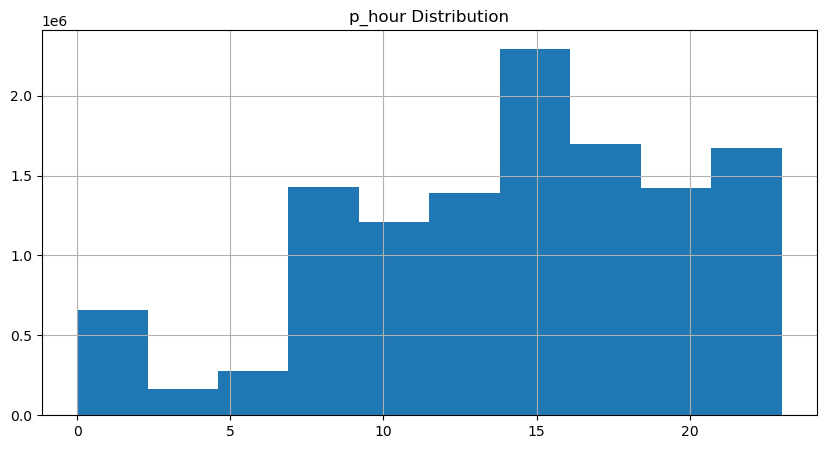

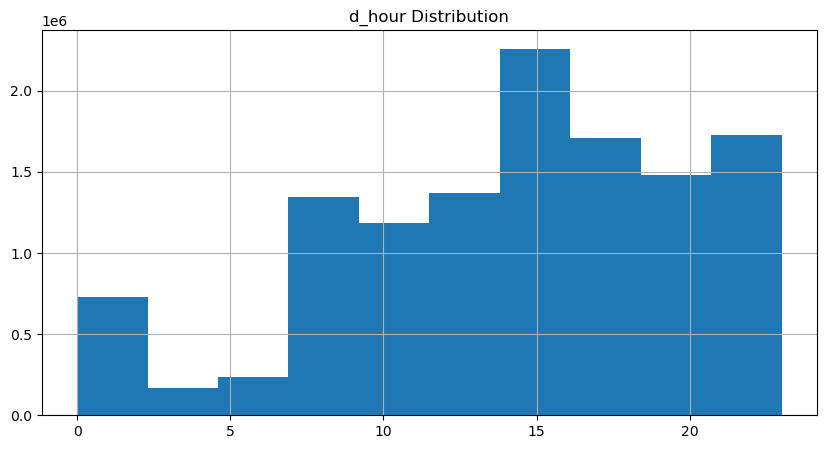

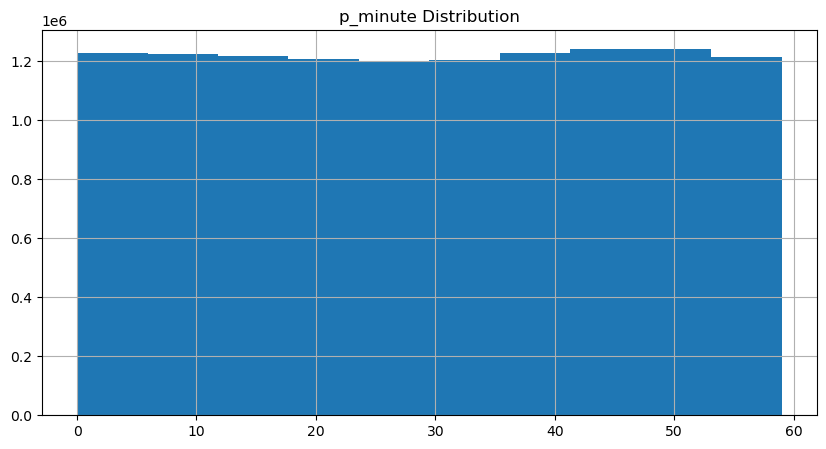

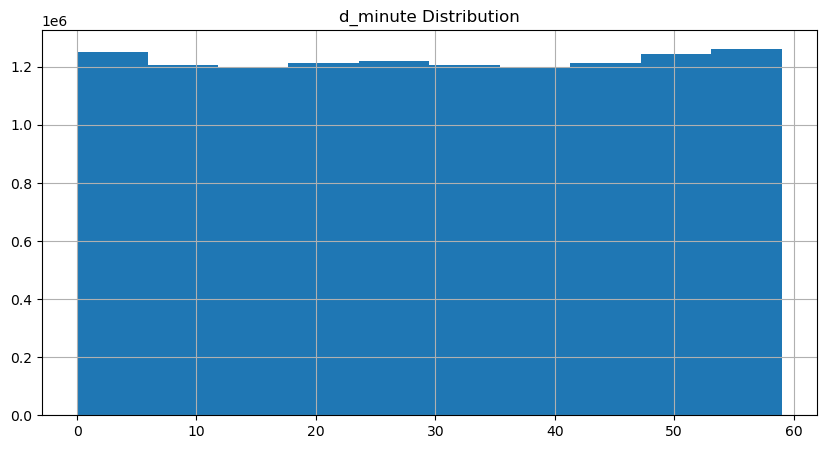

In [16]:
hist_cols = ['p_year', 'p_month', 'p_week', 'p_day', 'p_hour', 'd_hour', 'p_minute', 'd_minute']

for col in hist_cols:
    plt.figure(figsize=(10, 5))
    df_cat1[col].hist()
    plt.title(f"{col} Distribution")
    plt.show()


- p_year: Treated as categorical to capture variations that are unique to each year.
- p_month: Treated as categorical to capture seasonal patterns.
- p_week: Treated as categorical to capture weekly patterns.
- p_day: Treated as categorical to capture daily patterns.
- p_hour: Treated as numeric.
- d_hour: Treated as numeric.
- p_minute: Treated as numeric.
- d_minute: Treated as numeric.


In [17]:
# cols to numeric
cols_to_num = ['p_hour', 'd_hour', 'p_minute', 'd_minute', 'travel_time']
df_num1 = df_num.copy()
for col in cols_to_num:
    df_num1[col] = df_cat1[col].astype('int')
df_cat1.drop(columns=cols_to_num, inplace=True)

In [18]:
df_cat1.head()

,store_and_fwd_flag,VendorID,payment_type,PULocationID,DOLocationID,p_year,p_month,p_week,p_day,p_day_part,p_season
0,N,1,1,262,236,2024,1,0,22,evening,winter
1,N,2,1,236,236,2024,4,1,2,afternoon,spring
2,N,1,1,236,236,2024,4,2,17,afternoon,spring
3,N,2,1,138,186,2024,4,1,30,night,spring
4,N,2,1,132,249,2024,1,5,13,morning,winter


In [19]:

for c in df_cat1.columns:
    if df_cat1[c].dtype != 'category':
       df_cat1[c] = df_cat1[c].astype('category')

In [20]:
# Merge df_num1 and df_cat1
dff = pd.concat([df_num1, df_cat1], axis=1)

In [21]:
dff.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,...,VendorID,payment_type,PULocationID,DOLocationID,p_year,p_month,p_week,p_day,p_day_part,p_season
0,1.0,0.60,5.8,5.0,0.5,2.00,0.00,1.0,14.30,2.5,...,1,1,262,236,2024,1,0,22,evening,winter
1,2.0,0.79,7.2,0.0,0.5,2.24,0.00,1.0,13.44,2.5,...,2,1,236,236,2024,4,1,2,afternoon,spring
2,1.0,0.60,5.8,2.5,0.5,0.00,0.00,1.0,9.80,2.5,...,1,1,236,236,2024,4,2,17,afternoon,spring
3,1.0,8.91,36.6,6.0,0.5,3.00,6.94,1.0,58.29,2.5,...,2,1,138,186,2024,4,1,30,night,spring
4,1.0,18.05,70.0,0.0,0.5,16.19,6.94,1.0,98.88,2.5,...,2,1,132,249,2024,1,5,13,morning,winter


In [22]:
# Check for missing values
missing_v = []
err = []
x = len(dff)
for c in dff.columns:
    try:
        if sum(dff[c].isna()):
            missing_v.append(c)
        print(f"Missing values in {c} [{(dff[c].isna().sum()/x)*100}%]")
    except TypeError:
        err.append(c)

Missing values in passenger_count [4.104119088988272%]
Missing values in trip_distance [0.0%]
Missing values in fare_amount [0.0%]
Missing values in extra [0.0%]
Missing values in mta_tax [0.0%]
Missing values in tip_amount [0.0%]
Missing values in tolls_amount [0.0%]
Missing values in improvement_surcharge [0.0%]
Missing values in total_amount [0.0%]
Missing values in congestion_surcharge [4.104119088988272%]
Missing values in p_hour [0.0%]
Missing values in d_hour [0.0%]
Missing values in p_minute [0.0%]
Missing values in d_minute [0.0%]
Missing values in travel_time [0.0%]
Missing values in store_and_fwd_flag [4.104119088988272%]
Missing values in VendorID [0.0%]
Missing values in payment_type [0.0%]
Missing values in PULocationID [0.0%]
Missing values in DOLocationID [0.0%]
Missing values in p_year [0.0%]
Missing values in p_month [0.0%]
Missing values in p_week [0.0%]
Missing values in p_day [0.0%]
Missing values in p_day_part [0.0%]
Missing values in p_season [0.0%]


In [23]:
err

[]

In [24]:
# Drop rows with any missing values
dff = dff.dropna()

In [25]:

for c in dff.columns:
    try:
        if sum(dff[c].isna()):
            missing_v.append(c)
        print(f"Missing values in {c} [{(dff[c].isna().sum()/x)*100}%]")
    except TypeError:
        print(c)




Missing values in passenger_count [0.0%]
Missing values in trip_distance [0.0%]
Missing values in fare_amount [0.0%]
Missing values in extra [0.0%]
Missing values in mta_tax [0.0%]
Missing values in tip_amount [0.0%]
Missing values in tolls_amount [0.0%]
Missing values in improvement_surcharge [0.0%]
Missing values in total_amount [0.0%]
Missing values in congestion_surcharge [0.0%]
Missing values in p_hour [0.0%]
Missing values in d_hour [0.0%]
Missing values in p_minute [0.0%]
Missing values in d_minute [0.0%]
Missing values in travel_time [0.0%]
Missing values in store_and_fwd_flag [0.0%]
Missing values in VendorID [0.0%]
Missing values in payment_type [0.0%]
Missing values in PULocationID [0.0%]
Missing values in DOLocationID [0.0%]
Missing values in p_year [0.0%]
Missing values in p_month [0.0%]
Missing values in p_week [0.0%]
Missing values in p_day [0.0%]
Missing values in p_day_part [0.0%]
Missing values in p_season [0.0%]


In [26]:
# Drop rows with negative fare_amount
dff = dff[dff['fare_amount'] > 0]

num_cols = df_num1.columns.to_list()
cat_cols = df_cat1.columns.to_list()
xx = 0
for c in num_cols:
    s_ = (dff[c] < 0).sum()
    print(f"{c}: {s_}[{(s_/x)*100}%]")
    xx += s_

print(f"{xx}: [{(xx/x)*100}% data have negative values]")



passenger_count: 0[0.0%]
trip_distance: 5[4.09461140131442e-05%]
fare_amount: 0[0.0%]
extra: 9[7.370300522365955e-05%]
mta_tax: 0[0.0%]
tip_amount: 0[0.0%]
tolls_amount: 1[8.189222802628839e-06%]
improvement_surcharge: 0[0.0%]
total_amount: 0[0.0%]
congestion_surcharge: 0[0.0%]
p_hour: 0[0.0%]
d_hour: 0[0.0%]
p_minute: 0[0.0%]
d_minute: 0[0.0%]
travel_time: 0[0.0%]
15: [0.0001228383420394326% data have negative values]


In [27]:
# Drop rows with negative trip_distance, extra
dff = dff[dff['trip_distance'] > 0]
dff = dff[dff['extra'] > 0]

In [28]:
x = len(dff)
xx = 0
for c in num_cols:
    s_ = (dff[c] < 0).sum()
    print(f"{c}: {s_}[{(s_/x)*100}%]")
    xx += s_

print(f"{xx}: [{(xx/x)*100}% data have negative values]")

passenger_count: 0[0.0%]
trip_distance: 0[0.0%]
fare_amount: 0[0.0%]
extra: 0[0.0%]
mta_tax: 0[0.0%]
tip_amount: 0[0.0%]
tolls_amount: 0[0.0%]
improvement_surcharge: 0[0.0%]
total_amount: 0[0.0%]
congestion_surcharge: 0[0.0%]
p_hour: 0[0.0%]
d_hour: 0[0.0%]
p_minute: 0[0.0%]
d_minute: 0[0.0%]
travel_time: 0[0.0%]
0: [0.0% data have negative values]


[passenger_count] min: 0.0, max: 9.0


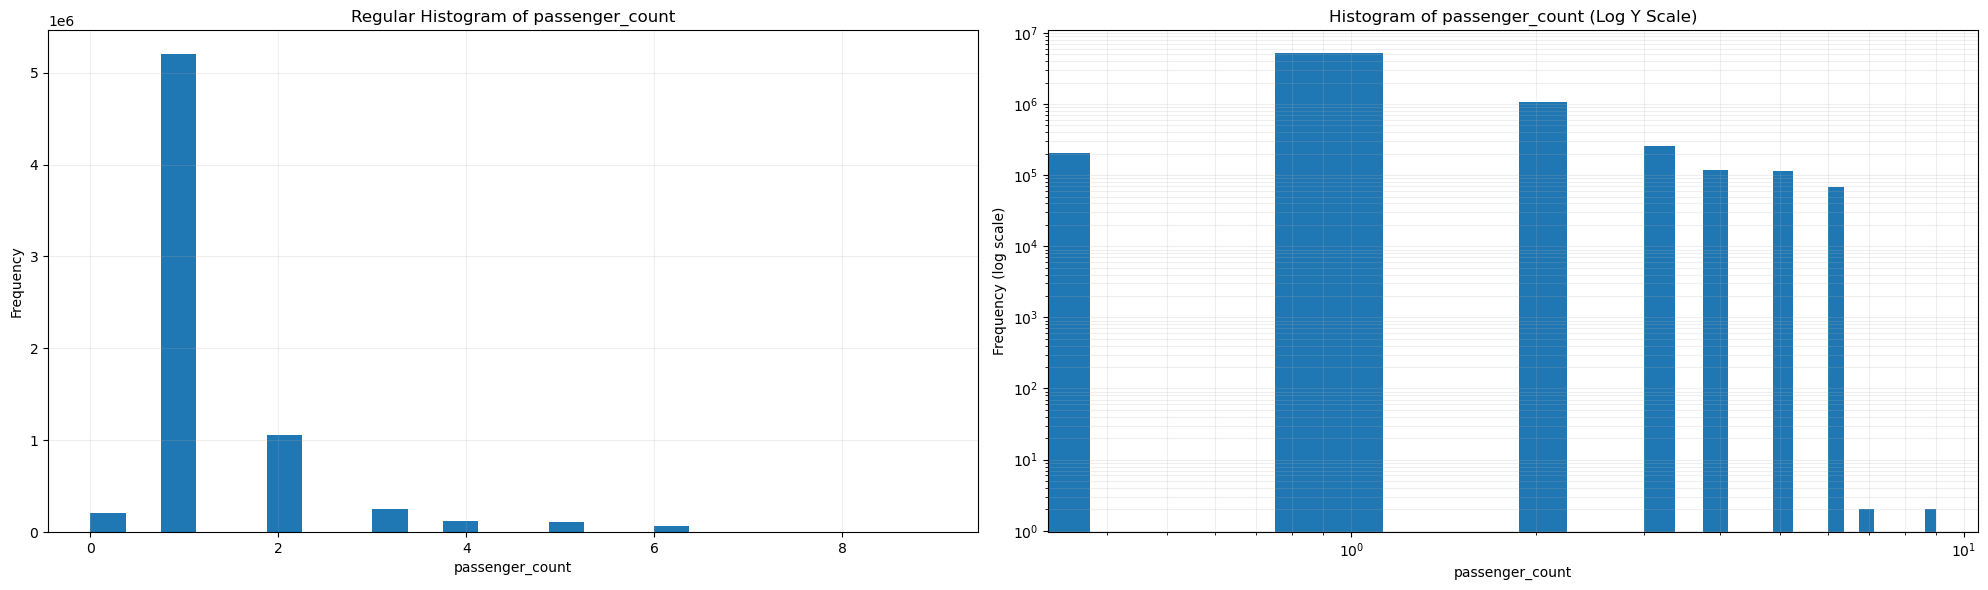

[trip_distance] min: 0.01, max: 9685.55


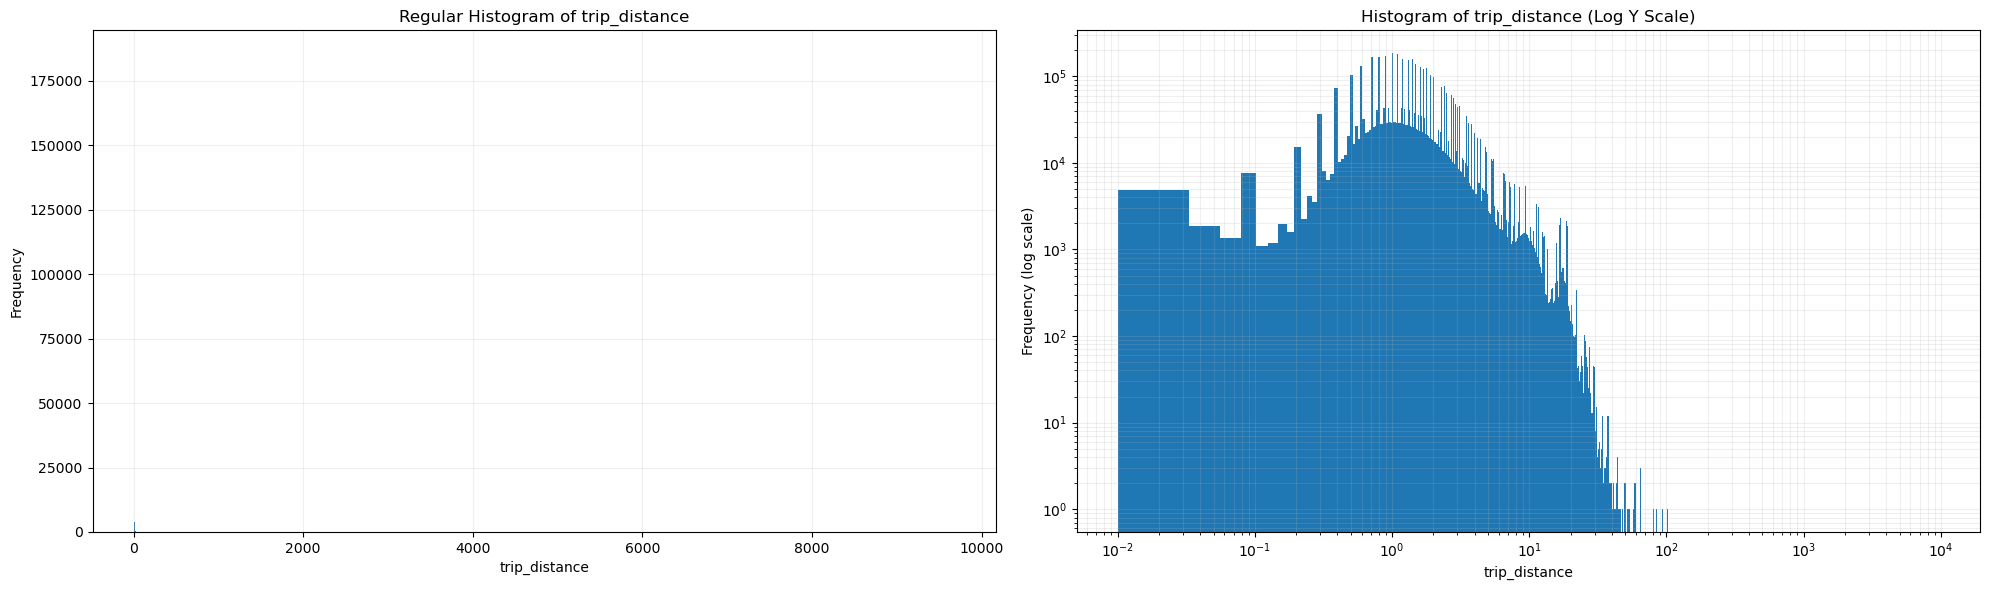

In [30]:
for c in num_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    # Regular histogram
    ax1.hist(dff[c], bins='auto')
    ax1.set_title(f'Regular Histogram of {c}')
    ax1.set_xlabel(c)
    ax1.set_ylabel('Frequency')
    ax1.grid(True, alpha=0.2)
    
    # Log Y-scale histogram
    ax2.hist(dff[c], bins='auto')
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_title(f'Histogram of {c} (Log Y Scale)')
    ax2.set_xlabel(c)
    ax2.set_ylabel('Frequency (log scale)')
    ax2.grid(True, which="both", ls="-", alpha=0.2)
    
    plt.tight_layout()
    print(f"[{c}] min: {dff[c].min()}, max: {dff[c].max()}")
    plt.show()


[fare_amount] min: 0.01, max: 6984.0, bins: 71918


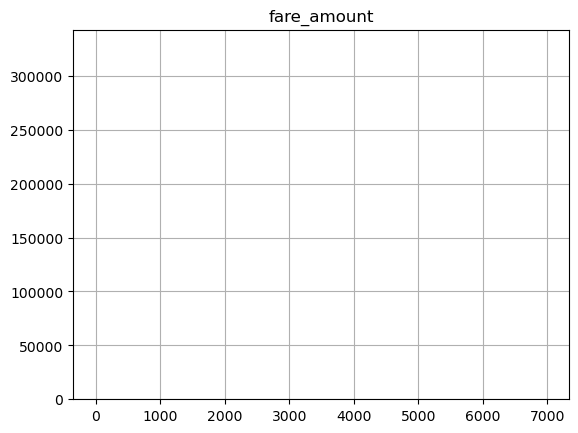

In [ ]:
def calculate_bins(data, method='sturges'):
    n = len(data)
    if method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
    elif method == 'sqrt':
        bins = int(np.ceil(np.sqrt(n)))
    elif method == 'rice':
        bins = int(np.ceil(2 * n**(1/3)))
    elif method == 'fd':
        iqr = np.percentile(data, 75) - np.percentile(data, 25)
        bin_width = 2 * iqr / n**(1/3)
        bins = int(np.ceil((max(data) - min(data)) / bin_width))
    else:
        raise ValueError("Unknown method")
    return bins


plt.figure()
bins = calculate_bins(dff['fare_amount'], method='fd')  # Change method as needed
dff['fare_amount'].hist(bins=bins)
plt.title('fare_amount')
print(f"[{'fare_amount'}] min: {dff['fare_amount'].min()}, max: {dff['fare_amount'].max()}, bins: {bins}")
plt.show()

In [ ]:

calculate_bins(dff['fare_amount'])

24